## Optimization Attempt 1: Preprocessing

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [32]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)


In [33]:
# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [34]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(app_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [35]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64


In [36]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()
print(class_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [37]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts_gt_1 = class_counts[class_counts > 1]
print(class_counts_gt_1)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [38]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [39]:
# Investigating status column
print(application_df['STATUS'].value_counts())

STATUS
1    34294
0        5
Name: count, dtype: int64


In [40]:
# Investigating special_considerations column
print(application_df['SPECIAL_CONSIDERATIONS'].value_counts())

SPECIAL_CONSIDERATIONS
N    34272
Y       27
Name: count, dtype: int64


In [41]:
# Removing both status and special_considerations columns
application_df = application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1)

application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [42]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_df = pd.get_dummies(application_df)
encoded_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,108590,1,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,5000,0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,6692,1,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
4,142590,1,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [43]:
# Split our preprocessed data into our features and target arrays
y = encoded_df['IS_SUCCESSFUL']
X = encoded_df.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)


In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 1: Compile, Train and Evaluate the Model

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(10, activation='relu', input_dim=len(X_train_scaled[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(10, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 10)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6495 - loss: 0.6267
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7159 - loss: 0.5711
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7259 - loss: 0.5633
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7276 - loss: 0.5614
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7335 - loss: 0.5519
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7293 - loss: 0.5564
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7301 - loss: 0.5561
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7291 - loss: 0.5533
Epoch 9/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7297 - loss: 0.5526
Epoch 10/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7312 - loss: 0.5539
Epoch 11/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7269 - loss: 0.5577
Epoch 12/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [48]:
# Evaluate the model using the test data
print(f"This model was created as an attempt to further optimize the model found in the file named \n'Alphabet_Soup_Charity.ipynb'\n")
print(f"Changes made to original model:\n1. Application_Type cutoff is now 1000.\n2. Dropped 'Status' and 'Special_Considerations' columns.\n3. Hidden layers now have 10 nodes.\n4. A hidden layer now using 'tanh' activation\n5. Number of epochs reduced to 50.\n")
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

This model was created as an attempt to further optimize the model found in the file named 
'Alphabet_Soup_Charity.ipynb'

Changes made to original model:
1. Application_Type cutoff is now 1000.
2. Dropped 'Status' and 'Special_Considerations' columns.
3. Hidden layers now have 10 nodes.
4. A hidden layer now using 'tanh' activation
5. Number of epochs reduced to 50.

268/268 - 0s - 2ms/step - accuracy: 0.7325 - loss: 0.5530
Loss: 0.5529890060424805, Accuracy: 0.732478141784668


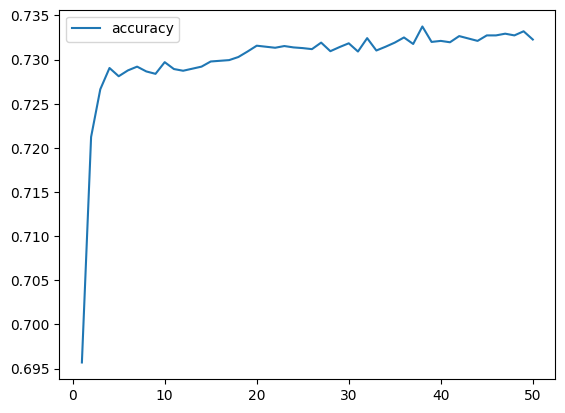

In [49]:
# Plot the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

# Save plot as PNG file
plt.savefig('Optimization_plot_1.png')

## Optimization Attempt 2: Preprocessing

In [50]:
# Read in the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [51]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [52]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 27000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts < 17000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts(), application_df['CLASSIFICATION'].value_counts())

APPLICATION_TYPE
T3       27037
Other     7262
Name: count, dtype: int64 CLASSIFICATION
C1000    17326
Other    16973
Name: count, dtype: int64


In [53]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_df = pd.get_dummies(application_df)

# Split our preprocessed data into our features and target arrays
y = encoded_df['IS_SUCCESSFUL']
X = encoded_df.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 2: Compile, Train and Evaluate the Model

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(10, activation='relu', input_dim=len(X_train_scaled[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(10, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(10, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5336 - loss: 0.7061
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5252 - loss: 0.6666
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5298 - loss: 0.6351
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5385 - loss: 0.6116
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5342 - loss: 0.6035
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5329 - loss: 0.6039
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5330 - loss: 0.5961
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 0.5974
Epoch 9/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5341 - loss: 0.5972
Epoch 10/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5300 - loss: 0.5981
Epoch 11/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5326 - loss: 0.5951
Epoch 12/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

In [56]:
# Evaluate the model using the test data
print(f"This model was created as a second attempt to further optimize the model found in the file named \n'Alphabet_Soup_Charity.ipynb'\n")
print(f"Changes made to original model:\n1. Application_Type cutoff is now 27000.\n2. Classification cutoff is now 17000.\n3. Hidden layers now have 10 nodes.\n4. Model now has 4 layers.\n5. Output layer now using 'softmax' activation.\n6. Optimizer changed to 'SGD'.\n7. Number of epochs reduced to 50.\n")
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

This model was created as a second attempt to further optimize the model found in the file named 
'Alphabet_Soup_Charity.ipynb'

Changes made to original model:
1. Application_Type cutoff is now 27000.
2. Classification cutoff is now 17000.
3. Hidden layers now have 10 nodes.
4. Model now has 4 layers.
5. Output layer now using 'softmax' activation.
6. Optimizer changed to 'SGD'.
7. Number of epochs reduced to 50.

268/268 - 0s - 2ms/step - accuracy: 0.5359 - loss: 0.5938
Loss: 0.593778669834137, Accuracy: 0.5358600616455078


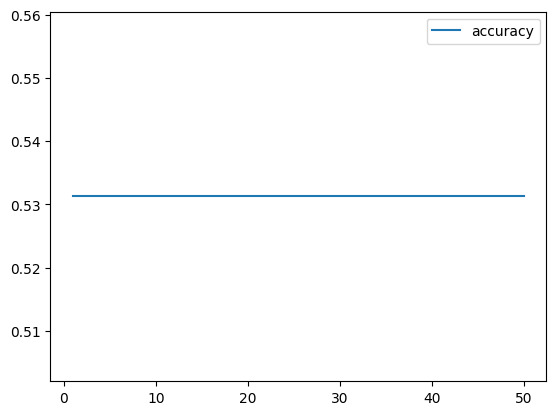

In [57]:
# Plot the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

# Save plot as PNG file
plt.savefig('Optimization_plot_2.png')

## Optimization Attempt 3: Preprocessing

In [58]:
# Read in the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [59]:
# Drop the non-beneficial ID column 'EIN'
application_df = application_df.drop('EIN', axis=1)

# Determine the number of unique values in each column.
print(application_df.nunique())

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [60]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts(), application_df['CLASSIFICATION'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64 CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [61]:
# Looking for columns with more than 10 unique values
columns_with_many_uniques = [col for col in application_df.columns if application_df[col].nunique() > 10]

# Iterate over these columns and get the count of each unique value
for col in columns_with_many_uniques:
    print(f"Column: {col}")
    print(application_df[col].value_counts())
    print("-----------")

Column: NAME
NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64
-----------
Column: ASK_AMT
ASK_AMT
5000        25398
10478           3
15583           3
6398

In [62]:
# Create cutoff of 4 for name_counts and replace values with 'Other'
name_counts = application_df['NAME'].value_counts()

names_to_replace = list(name_counts[name_counts < 4].index)

for name in names_to_replace:
  application_df['NAME'] = application_df['NAME'].replace(name, 'Other')

# Check to make sure replacement was successful
print(application_df['NAME'].value_counts())

NAME
Other                                 19515
PARENT BOOSTER USA INC                 1260
TOPS CLUB INC                           765
UNITED STATES BOWLING CONGRESS INC      700
WASHINGTON STATE UNIVERSITY             492
                                      ...  
OMEGA PSI PHI FRATERNITY                  4
AMERICAN COACH ASSOCIATION                4
PTA NEW MEXICO CONGRESS                   4
INDUSTRIAL WORKERS OF THE WORLD           4
PHI DELTA KAPP INTERNATIONAL INC          4
Name: count, Length: 475, dtype: int64


In [63]:
# Create cutoff of 4 for ask_counts and replace values with 'Other'
ask_counts = application_df['ASK_AMT'].value_counts()

asks_to_replace = list(ask_counts[ask_counts < 4].index)

for ask in asks_to_replace:
  application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(ask, 'Other')

# Check to make sure replacement was successful
print(application_df['ASK_AMT'].value_counts())


ASK_AMT
5000     25398
Other     8901
Name: count, dtype: int64


In [64]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_df = pd.get_dummies(application_df)

# Split our preprocessed data into our features and target arrays
y = encoded_df['IS_SUCCESSFUL']
X = encoded_df.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Optimization Attempt 3: Compile, Train and Evaluate the Model

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=len(X_train_scaled[0])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,033 (140.75 KB)

 Trainable params: 36,033 (140.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=50)

Epoch 1/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7414 - loss: 0.5320 - val_accuracy: 0.7940 - val_loss: 0.4428
Epoch 2/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7955 - loss: 0.4255 - val_accuracy: 0.7945 - val_loss: 0.4410
Epoch 3/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7977 - loss: 0.4213 - val_accuracy: 0.7961 - val_loss: 0.4397
Epoch 4/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7998 - loss: 0.4206 - val_accuracy: 0.7971 - val_loss: 0.4387
Epoch 5/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7938 - loss: 0.4274 - val_accuracy: 0.7966 - val_loss: 0.4421
Epoch 6/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8029 - loss: 0.4131 - val_accuracy: 0.7971 - val_loss: 0.4427
Epoch 7/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8018 - loss: 0.4142 - val_accuracy: 0.7930 - val_loss: 0.4447
Epoch 8/50
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8046 - loss: 0.4110 - val_accuracy: 0.

In [67]:
# Evaluate the model using the test data
print(f"This model was created as a third attempt to further optimize the model found in the file named \n'Alphabet_Soup_Charity.ipynb'\n")
print(f"Changes made to original model:\n1. Name column was not dropped. Binned all names with value counts less than 4.\n2. Created a bin for Ask_Amt containing values with a value count less than 4.\n3. There are 5 layers now. Neurons for each are 64, 32, 16, 8, 1.\n4. Validation split of 0.15 added to .fit().\n5. Number of epochs reduced to 50.\n")
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

This model was created as a third attempt to further optimize the model found in the file named 
'Alphabet_Soup_Charity.ipynb'

Changes made to original model:
1. Name column was not dropped. Binned all names with value counts less than 4.
2. Created a bin for Ask_Amt containing values with a value count less than 4.
3. There are 5 layers now. Neurons for each are 64, 32, 16, 8, 1.
4. Validation split of 0.15 added to .fit().
5. Number of epochs reduced to 50.

268/268 - 1s - 2ms/step - accuracy: 0.8019 - loss: 0.4516
Loss: 0.4515835642814636, Accuracy: 0.8018658757209778


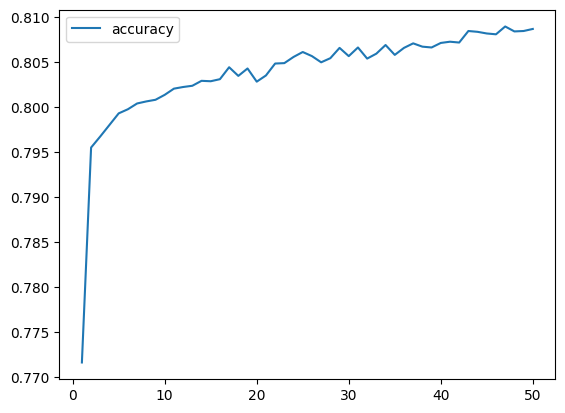

In [69]:
# Plot the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

# Save plot as PNG file
plt.savefig('Optimization_plot_3.png')

In [70]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')